In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
!pip install pyarrow

In [77]:
all_data = pd.read_feather(r'C:\Users\utkun\OneDrive\Desktop\Data Analysis Udemy\Sales_data.ftr')

In [78]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [79]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [80]:
all_data = all_data.dropna(how='all')

In [81]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [82]:
all_data.duplicated().sum()

618

In [83]:
all_data = all_data.drop_duplicates()

In [84]:
all_data.duplicated().sum()

0

In [85]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [86]:
def month(x):
    return x.split('/')[0]

In [87]:
all_data['Month'] = all_data['Order Date'].apply(month)

In [88]:
all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [89]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [90]:
filter1 = all_data['Month'] == 'Order Date'

In [91]:
all_data[filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [92]:
all_data = all_data[-filter1]

In [93]:
all_data['Month'] = all_data['Month'].astype(int)

In [94]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [95]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [96]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

<Axes: xlabel='Month'>

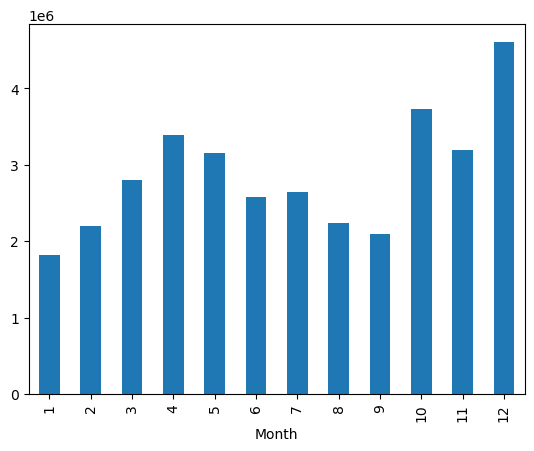

In [97]:
all_data.groupby(['Month'])['Sales'].sum().plot(kind='bar')

In [98]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [99]:
def country(x):
    return x.split(',')[1]

In [100]:
all_data['City'] = all_data['Purchase Address'].apply(country)

In [101]:
all_data['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

<Axes: ylabel='count'>

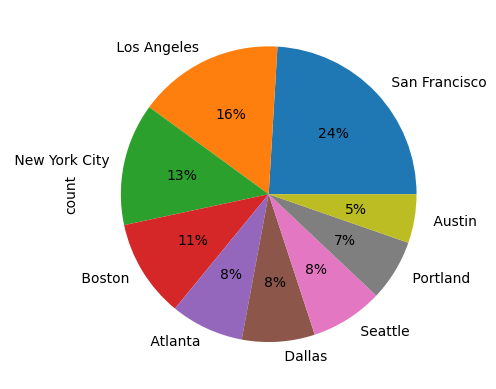

In [102]:
pd.value_counts(all_data['City']).plot(kind='pie',autopct='%1.0f%%')

In [103]:
all_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

<Axes: ylabel='Product'>

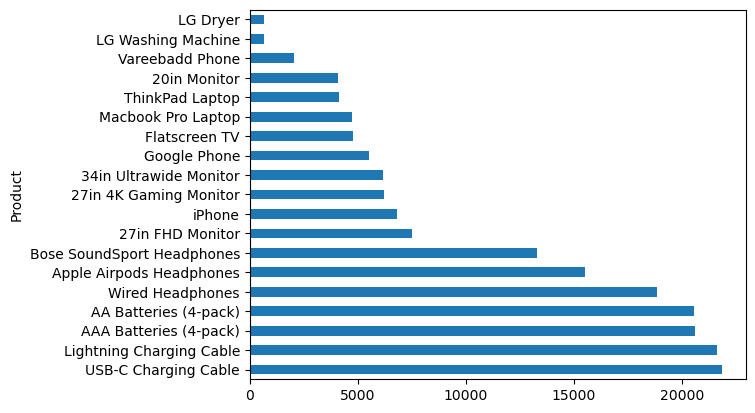

In [104]:
pd.value_counts(all_data['Product']).plot(kind='barh')

In [105]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [106]:
pd.value_counts(all_data['Product'])

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [108]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered' : 'sum' , 'Price Each' : 'mean'})

In [109]:
count_df = count_df.reset_index()

In [113]:
prod = count_df['Product'].values

C:\Users\utkun\AppData\Local\Temp\ipykernel_26384\2251151216.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod,rotation='vertical')


Text(0.5, 0, 'Products')

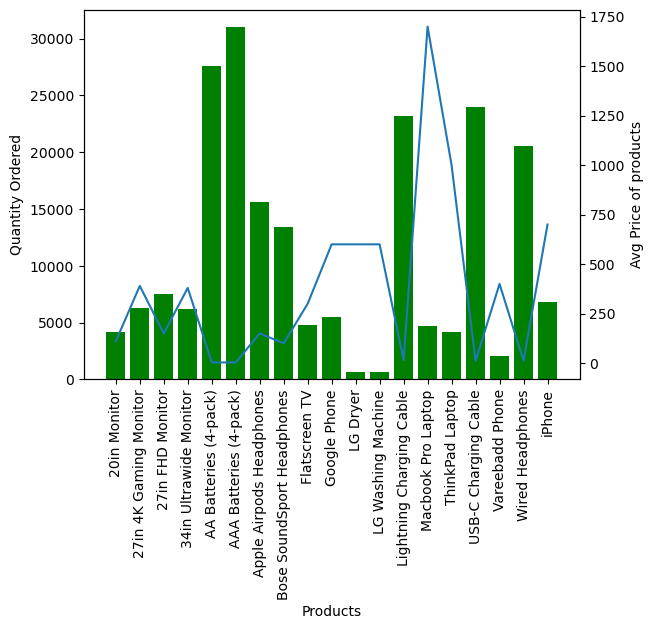

In [119]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(count_df['Product'] , count_df['Quantity Ordered'] , color='g')
ax2.plot(count_df['Product'] , count_df['Price Each'])
ax1.set_xticklabels(prod,rotation='vertical')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Avg Price of products')
ax1.set_xlabel('Products')

In [122]:
count=count_df[['Quantity Ordered' , 'Price Each']]

In [124]:
count.corr()

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.601297
Price Each,-0.601297,1.000000
